In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/var/jupyter/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [2]:
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


/root/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

In [5]:
# Making Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized

array([[ 0.95588235,  0.04411765],
       [ 0.25      ,  0.75      ]])

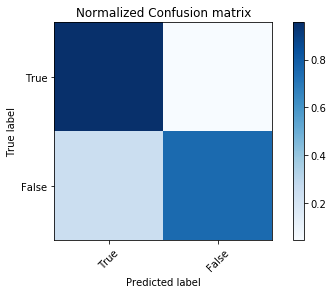

In [6]:
def plot_confusion_matrix(cm, columns=["True","False"], title='Confusion matrix', cmap=plt.cm.Blues):
    ''' confusion_matrixをheatmap表示する関数
    Keyword arguments:
        cm -- confusion_matrix
        title -- 図の表題
        cmap -- 使用するカラーマップ

    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(columns))
    plt.xticks(tick_marks, columns, rotation=45)
    plt.yticks(tick_marks, columns)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized Confusion matrix')
plt.show()

In [7]:
# accuracy, recall_score, f1_score
# F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import accuracy_score, recall_score, f1_score
print ("accuracy:%.2f" % accuracy_score(y_test, y_pred))
print ("recall:%.2f" % recall_score(y_test, y_pred))
print ("F1:%.2f" % f1_score(y_test, y_pred))

accuracy:0.89
recall:0.75
F1:0.81


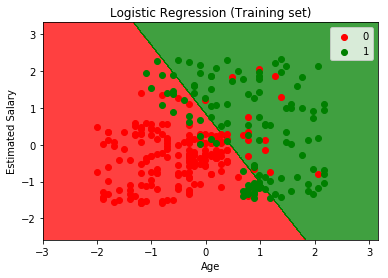

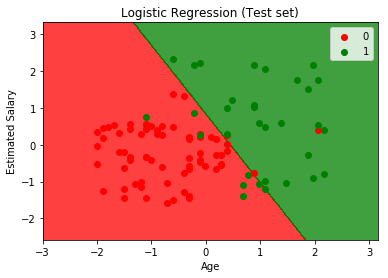

In [8]:
def plot_result(classifier, title, x_label, y_label, X_set, y_set):
    from matplotlib.colors import ListedColormap
    # plot predict data
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # plot real data
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()
    
# Visualising the Training set results
title, x_label, y_label = "Logistic Regression (Training set)","Age","Estimated Salary"
plot_result(classifier, title, x_label, y_label, X_train, y_train)

# Visualising the Test set results
title, x_label, y_label = "Logistic Regression (Test set)","Age","Estimated Salary"
plot_result(classifier, title, x_label, y_label, X_test, y_test)


In [20]:
# Fitting SVM to the Training set
# RBFカーネル, radial basis function, Gaussian カーネル
# RBFカーネルを用いたSVMでは, 以下の2つのハイパーパラメータを調整します.
#   コストパラメータ: CC
#  RBFカーネルのパラメータ: γ

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [22]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized

array([[ 0.94117647,  0.05882353],
       [ 0.09375   ,  0.90625   ]])

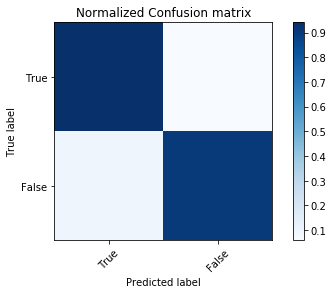

In [23]:
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized Confusion matrix')
plt.show()

In [24]:
print ("accuracy:%.2f" % accuracy_score(y_test, y_pred))
print ("recall:%.2f" % recall_score(y_test, y_pred))
print ("F1:%.2f" % f1_score(y_test, y_pred))

accuracy:0.93
recall:0.91
F1:0.89


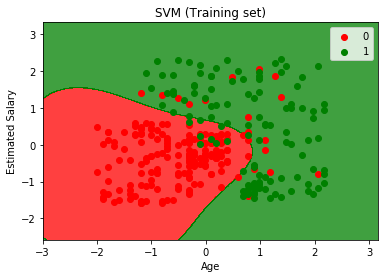

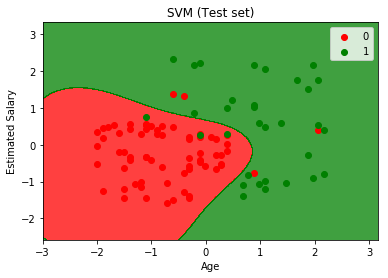

In [25]:
# Visualising the Training set results
title, x_label, y_label = "SVM (Training set)","Age","Estimated Salary"
plot_result(classifier, title, x_label, y_label, X_train, y_train)

# Visualising the Test set results
title, x_label, y_label = "SVM (Test set)","Age","Estimated Salary"
plot_result(classifier, title, x_label, y_label, X_test, y_test)